In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pylab as pl
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("tamrin1.csv")
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [3]:
# removing the rows in which the Area is wrong (very large numbers)
for i in range(len(df["Area"])):
    if "," in df["Area"][i]:
        df = df.drop(i)
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [4]:
# getting the number of missing data and removing their rows

# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

# removing the missing values
df = df.dropna()
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [5]:
le = preprocessing.LabelEncoder()
le.fit(df["Address"])
list(le.classes_)
df["Address"] = le.transform(df["Address"])

<Axes: >

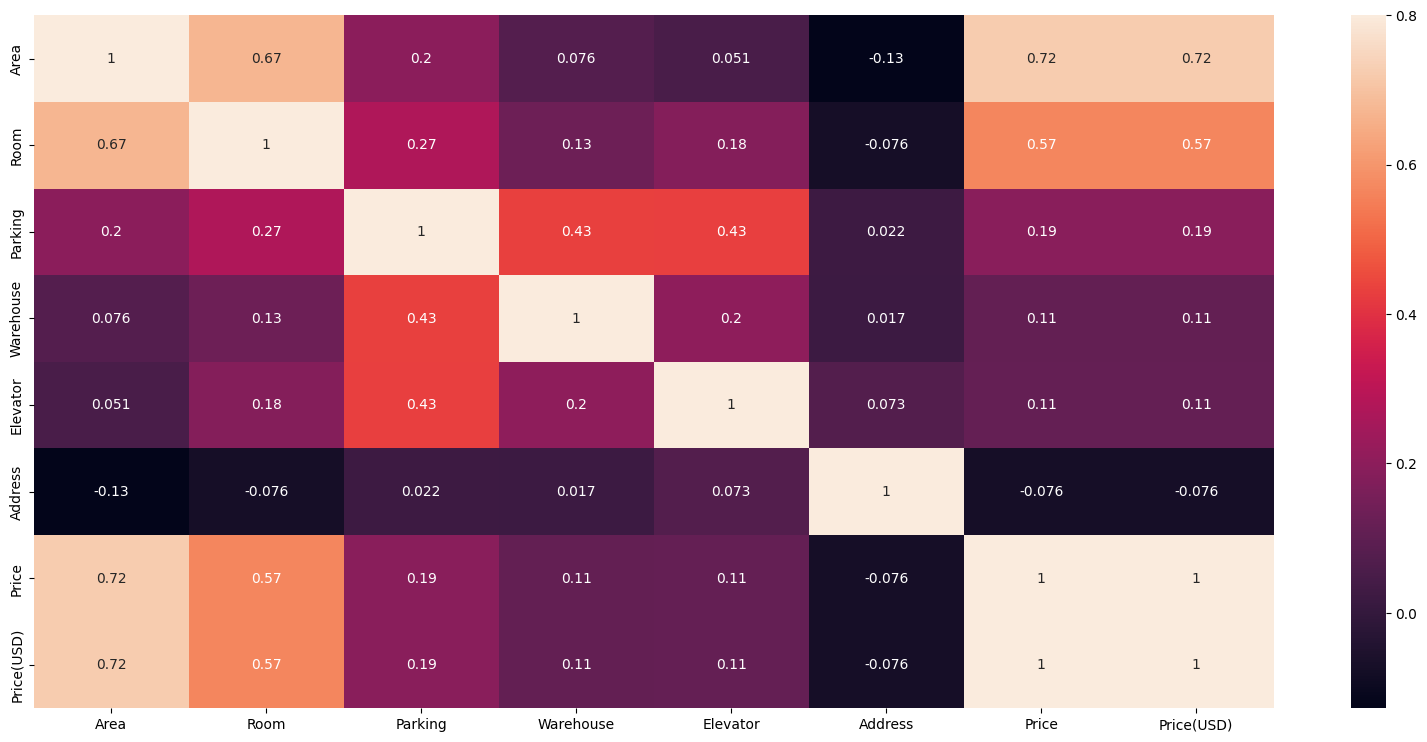

In [6]:
# correlation check
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

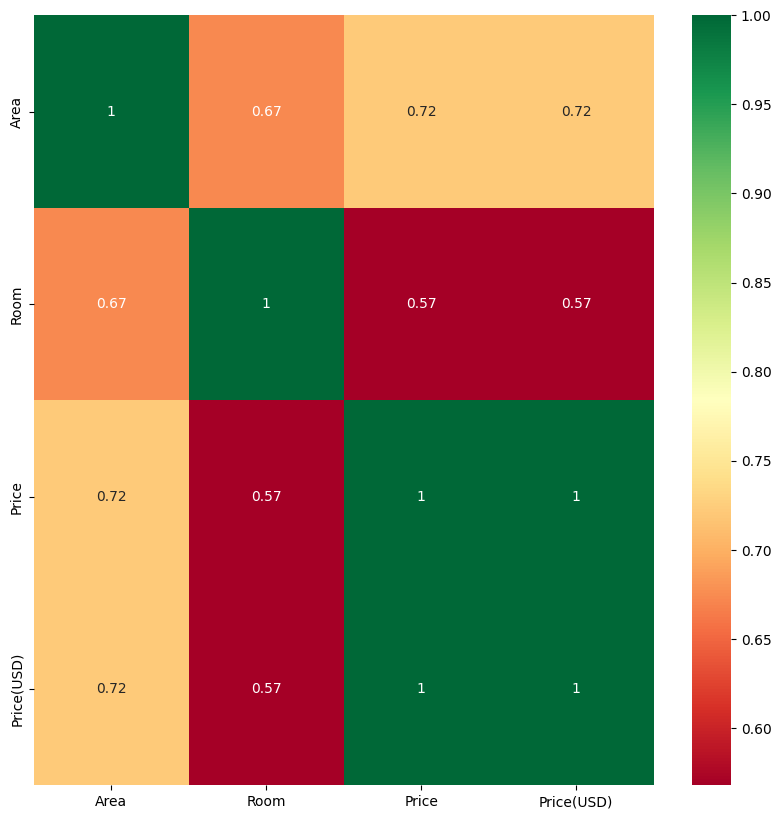

In [7]:
# most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["Price(USD)"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Lenovo\AppData\Roam

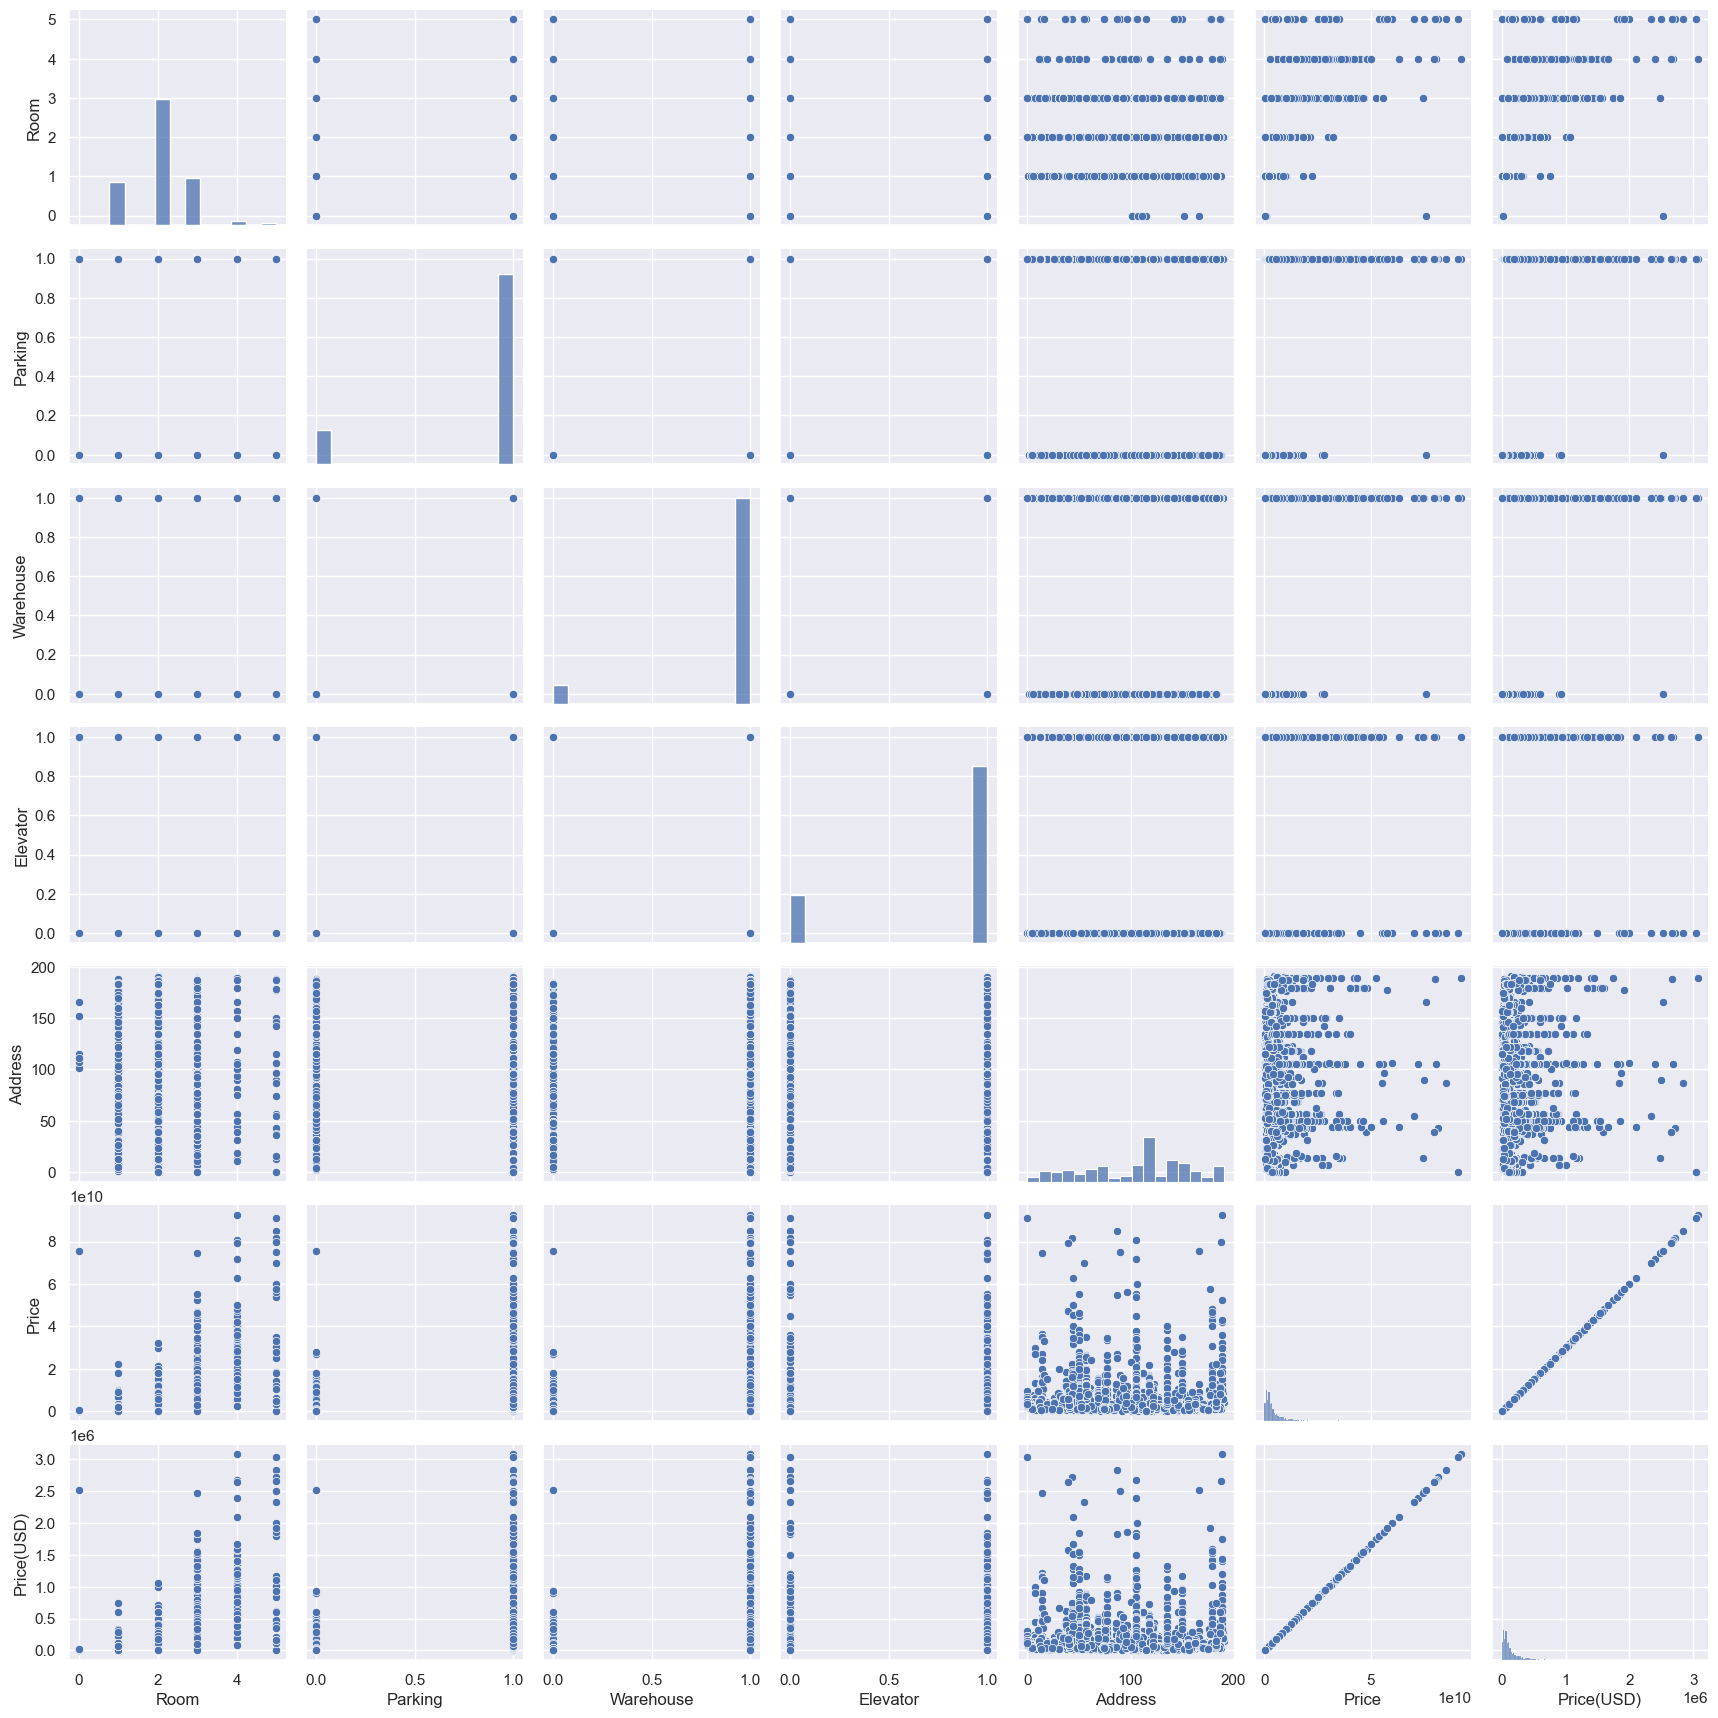

In [8]:
sns.set()
sns.pairplot(df, size = 2.5)
plt.show()

In [9]:
# seperating train and test
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

In [10]:
#determing test and train x and y 
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Area','Room','Parking', "Warehouse", "Elevator", "Address"]])
y_train = np.asanyarray(train[["Price(USD)"]])
x_test = np.asanyarray(test[['Area','Room','Parking', "Warehouse", "Elevator", "Address"]])
y_test = np.asanyarray(test[["Price(USD)"]])

In [11]:
#building the model 
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

# train the model
clf.fit(x_train, y_train)

# predict on test data
predict = clf.predict(x_test)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 120399.9115
r2 score: 0.7560


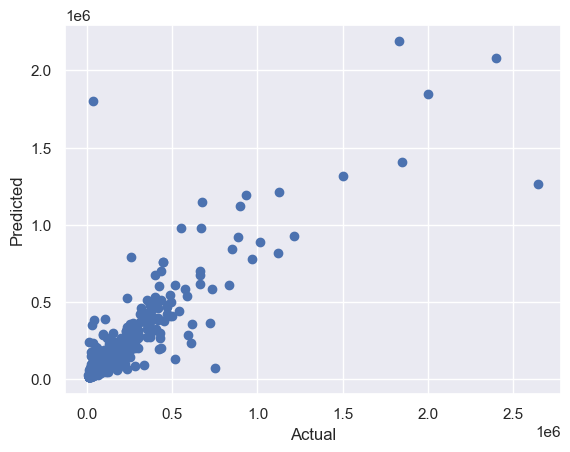

In [12]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(y_test, predict)
plt.ylabel('Predicted')
plt.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, predict)))
print('r2 score: %.4f' % r2_score(y_test, predict))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10860\3348234412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict)


<Axes: ylabel='Density'>

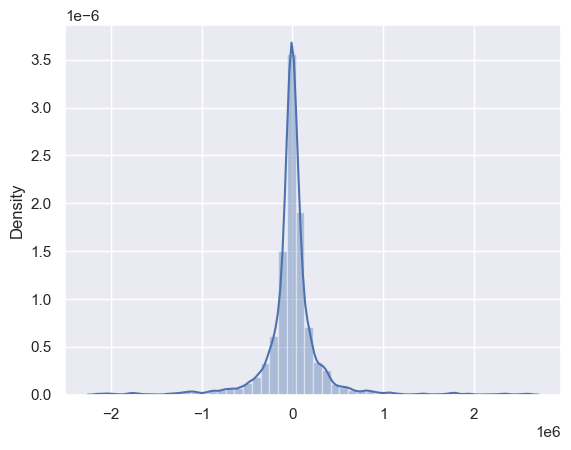

In [16]:
#Evaluating the model
sns.distplot(y_test-predict)

In [18]:
# predicting
print("give the features of your house: ")
Area = input("Area: "); Room = input("number of rooms: "); Parking = input("Does it have a parking? Yes with 1, No with 0: "); 
Warehouse = input("Does it have a warehouse? Yes with 1, No with 0: "); Elevator = input("Does it have an Elavator? Yes with 1, No with 0: "); Address = input("Address: ")   

a = np.array([Area, Room, Parking, Warehouse, Elevator, Address])
a = a.reshape(1, -1)
print(f"{clf.predict(a)} $")

give the features of your house: 
[25601.0019] $
